Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from collections import Counter

In [3]:
filename = os.path.join(os.getcwd(), "US_youtube_trending_data.csv")
df = pd.read_csv(filename, header=0)

In [4]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [7]:
print(df.columns)

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [8]:
idx = df.groupby('video_id')['view_count'].idxmax()
dfUnique = df.loc[idx].reset_index(drop=True)
## getting dataframe with no duplicate view counts

In [9]:
dfUnique.head(10)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10T16:00:00Z,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15T00:00:00Z,Migos|Avalanche|Quality|Control|Music/Motown|R...,6823249,262692,4107,16445,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...
1,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09T23:19:08Z,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15T00:00:00Z,[None],538485,17290,0,1439,https://i.ytimg.com/vi/--2O86Z0hsM/default.jpg,False,False,NaN
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20T01:03:32Z,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-25T00:00:00Z,[None],682609,8029,369,723,https://i.ytimg.com/vi/--40TEbZ9Is/default.jpg,False,False,Hannah Waddingham wins the Emmy for Supporting...
3,--47FjCWgrU,San Francisco 49ers vs. Arizona Cardinals Game...,2023-12-18T00:21:58Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2023-12-25T00:00:00Z,[None],1940781,22612,0,2018,https://i.ytimg.com/vi/--47FjCWgrU/default.jpg,False,False,Check out our other channels:NFL Mundo https:/...
4,--5-brQiQFg,Washington Commanders vs. San Francisco 49ers ...,2022-12-25T00:30:17Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,2022-12-26T00:00:00Z,[None],1280997,14603,0,2078,https://i.ytimg.com/vi/--5-brQiQFg/default.jpg,False,False,Check out our other channels:NFL Mundo https:/...
5,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07T13:00:00Z,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11T00:00:00Z,retaining wall|New Jersey highway|Direct Conne...,623949,29991,320,998,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,One of the most important (and innocuous) part...
6,--FmExEAsM8,IVE 아이브 'ELEVEN' MV,2021-12-01T09:00:03Z,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,10,2021-12-06T00:00:00Z,Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...,31967789,810589,14252,52092,https://i.ytimg.com/vi/--FmExEAsM8/default.jpg,False,False,IVE Twitter: https://twitter.com/IVEstarship: ...
7,--SvHNpSvpk,YoungBoy Never Broke Again - Dead Trollz [Offi...,2020-09-11T15:00:00Z,UClW4jraMKz6Qj69lJf-tODA,YoungBoy Never Broke Again,10,2020-09-18T00:00:00Z,YoungBoy Never Broke Again|NBA YoungBoy|YoungB...,5308719,175482,4544,15346,https://i.ytimg.com/vi/--SvHNpSvpk/default.jpg,False,False,YoungBoy Never Broke Again – Dead Trollz ‘TOP...
8,--gJDs10ShA,what happens if you get greedy and try to pull...,2022-06-16T01:11:59Z,UC_54BddY_xCboN2ktKg_yjw,Hydraulic Beanbag,1,2022-06-21T00:00:00Z,Blender|Animation|Animated Video|Blender Anima...,3089272,157048,0,3945,https://i.ytimg.com/vi/--gJDs10ShA/default.jpg,False,False,today was supposed to be my self appointed hed...
9,--hjHKgm67g,The Third Attempt Making This Table,2022-04-07T19:14:45Z,UC6I0KzAD7uFTL1qzxyunkvA,Blacktail Studio,26,2022-04-13T00:00:00Z,bookmatched guitar top|bookmatched wood|comput...,857931,28461,0,3871,https://i.ytimg.com/vi/--hjHKgm67g/default.jpg,False,False,I tried to make this unique ebonized table twi...


In [11]:
video_counts = (df['video_id'].value_counts())

In [12]:
video_counts.describe()

count    47142.000000
mean         5.701646
std          1.994629
min          1.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         37.000000
Name: count, dtype: float64

In [22]:
print((video_counts == 1).sum())

545


In [24]:
df.shape

(268787, 16)

In [28]:
print(47142/268787) 
## 17 % are unique videos
print(545/268787)
##0.2% of videos appear only once

0.17538794658967882
0.0020276278242623343


Understanding tags

In [29]:
print(dfUnique['tags']) ## how they look like
df['tag_count'] = df['tags'].apply(lambda x: len(x.split('|')))
dfUnique['tag_count'] = df['tags'].apply(lambda x: len(x.split('|')))
average_tags = dfUnique['tag_count'].mean() 
print(dfUnique['tag_count'].describe())
## tags are user generated, could be fake just to get trending. the mean is 16 tags
onetag = dfUnique[dfUnique['tag_count'] == 1]
print(onetag['tags']) ## these tags all appear to be none, a default tag?
print(onetag.shape[0]/dfUnique.shape[0]) ## 13% of people have none tags, keep that in mind

0        Migos|Avalanche|Quality|Control|Music/Motown|R...
1                                                   [None]
2                                                   [None]
3                                                   [None]
4                                                   [None]
                               ...                        
47137    Lil Tjay|Steady Calling My Phone|Calling My Ph...
47138    NBA|G League|Basketball|game-0022000187|Lakers...
47139    MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...
47140    maxcraft|minecraft maxcraft|100 days minecraft...
47141    kurtis conner|commentary|movie review|alpha|fa...
Name: tags, Length: 47142, dtype: object
count    47142.000000
mean        17.792542
std         12.475244
min          1.000000
25%          7.000000
50%         17.000000
75%         27.000000
max         74.000000
Name: tag_count, dtype: float64
6        Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...
10       ABC|Moscow|News|Russia|Tonight|Wor

In [30]:
dfUnique['tag_list'] = dfUnique['tags'].apply(lambda x: x.split('|')[:-1])
df['tag_list'] = df['tags'].apply(lambda x: x.split('|')[:-1]) ## splitting this tag list up into another column

In [31]:
dfUnique['tag_list'] = dfUnique['tag_list'].apply(lambda x: [tag.lower() for tag in x])

In [32]:
dfUnique['tag_list']

0        [migos, avalanche, quality, control, music/mot...
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
47137    [lil tjay, steady calling my phone, calling my...
47138    [nba, g league, basketball, game-0022000187, l...
47139    [mamamoo, 마마무, waw, 마마무 waw, mamamoo waw, wher...
47140    [maxcraft, minecraft maxcraft, 100 days minecr...
47141     [kurtis conner, commentary, movie review, alpha]
Name: tag_list, Length: 47142, dtype: object

In [33]:
tags_exploded = dfUnique.explode('tag_list')

In [34]:
top_50_tags = tags_exploded.value_counts().head(50)

In [35]:
all_tags = [tag for sublist in df['tag_list'] for tag in sublist]
tag_counts = Counter(all_tags)

# 50 most common tags
top_50_tags = tag_counts.most_common(50)
print(top_50_tags)

[('funny', 14516), ('comedy', 9536), ('minecraft', 8590), ('challenge', 6134), ('gaming', 4862), ('vlog', 4540), ('animation', 3887), ('family friendly', 3755), ('news', 3670), ('fortnite', 3651), ('highlights', 3580), ('how to', 3417), ('football', 3372), ('tiktok', 3358), ('music', 3356), ('sports', 3336), ('rap', 3308), ('Minecraft', 3304), ('gameplay', 3185), ('new', 3072), ('NBA', 3056), ('family', 3052), ('reaction', 2981), ('game', 2900), ('video', 2893), ('hip hop', 2793), ('Records', 2671), ('trailer', 2552), ('Football', 2462), ('Rap', 2352), ('soccer', 2336), ('diy', 2298), ('nintendo', 2176), ('review', 2164), ('science', 2148), ('minecraft challenge', 2112), ('games', 2108), ('fun', 2044), ('Hip Hop', 2036), ('nba', 2035), ('Basketball', 1969), ('minecraft hardcore', 1969), ('food', 1915), ('parody', 1901), ('prank', 1889), ('boxing', 1877), ('video games', 1865), ('pokemon', 1859), ('laugh', 1835), ('fortnite battle royale', 1799)]


In [36]:
## the above  good insight into what tags are most commonly used

Understanding Channels

In [37]:
channel_counts = dfUnique.groupby('channelId').size().reset_index(name='video_count')
channel_counts = channel_counts.merge(dfUnique[['channelId', 'channelTitle']].drop_duplicates(), on='channelId')
top_50_channels = channel_counts.sort_values(by='video_count', ascending=False).head(50)
top_50_channels[['channelTitle', 'video_count']]

,channelTitle,video_count
1975,NFL,422
4524,NBA,396
7270,NBC Sports,167
2087,CBS Sports Golazo,146
2088,Champions League on CBS Sports,146
6238,ESPN,131
6521,SSundee,128
7058,SSSniperWolf,117
587,Big Hit Labels,111
588,HYBE LABELS,111


In [38]:
dfUnique['publishedAt'] = pd.to_datetime(dfUnique['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
dfUnique['trending_date'] = pd.to_datetime(dfUnique['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%dT%H:%M:%SZ')

In [39]:
df['days_between'] = (df['trending_date'] - df['publishedAt']).dt.days
dfUnique['days_between'] = (dfUnique['trending_date'] - dfUnique['publishedAt']).dt.days

In [40]:
dfUnique['days_between'].describe()

count    47142.000000
mean         5.235119
std          2.002491
min         -1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         36.000000
Name: days_between, dtype: float64

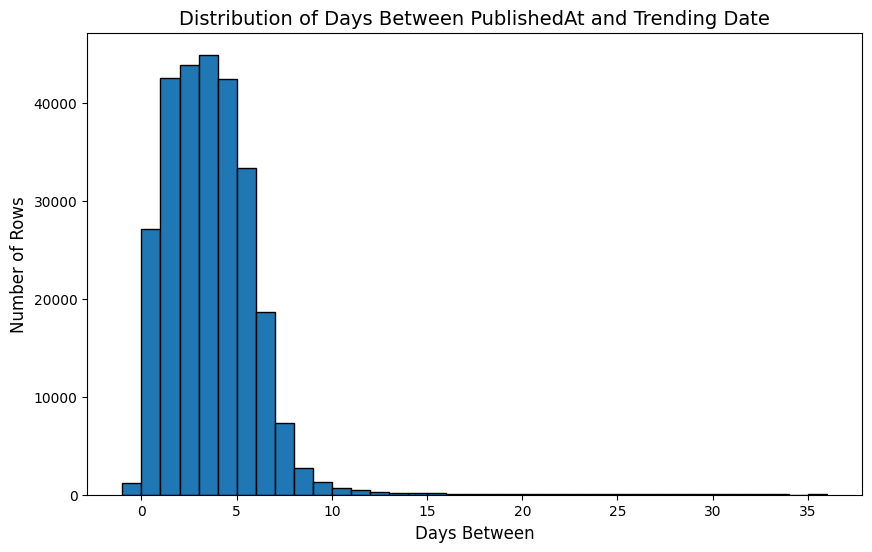

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df['days_between'], bins=37, edgecolor='black')
plt.title('Distribution of Days Between PublishedAt and Trending Date', fontsize=14)
plt.xlabel('Days Between', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.show()

In [42]:
## looks like most of the entries are within 5 days of posting

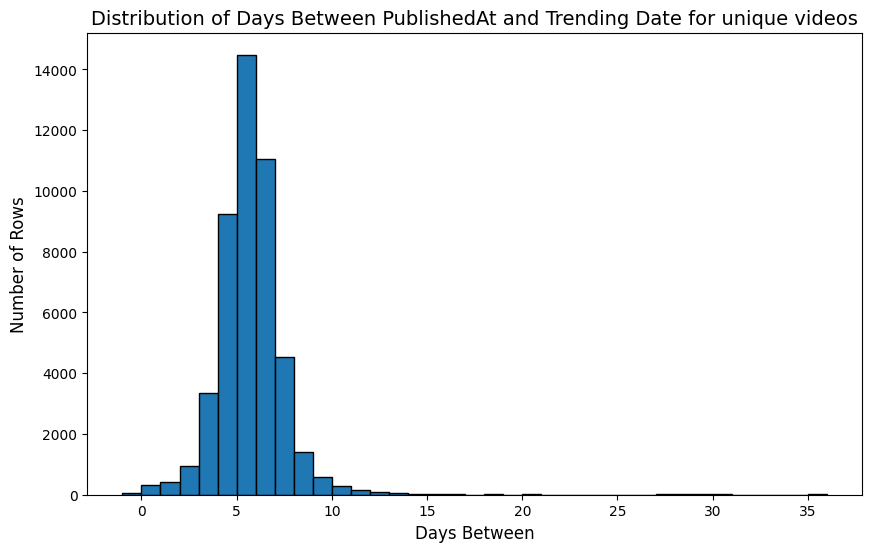

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(dfUnique['days_between'], bins=37, edgecolor='black')
plt.title('Distribution of Days Between PublishedAt and Trending Date for unique videos', fontsize=14)
plt.xlabel('Days Between', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.show()

In [44]:
##highest view count happens to be right at like 5 days. 4-6 days basically

In [45]:
df.drop('dislikes', axis=1, inplace=True)
dfUnique.drop('dislikes', axis=1, inplace=True)

In [46]:
df.drop('thumbnail_link', axis=1, inplace=True)
dfUnique.drop('thumbnail_link', axis=1, inplace=True)

In [47]:
df['ratings_disabled'] = df['ratings_disabled'].astype(int)
df['comments_disabled'] = df['comments_disabled'].astype(int)

dfUnique['ratings_disabled'] = dfUnique['ratings_disabled'].astype(int)
dfUnique['comments_disabled'] = dfUnique['comments_disabled'].astype(int)

In [48]:
correlation_view = df[['ratings_disabled', 'comments_disabled', 'view_count', 'comment_count']].corr(method='pearson')
correlation_spearman = df[['ratings_disabled', 'comments_disabled', 'view_count', 'comment_count']].corr(method='spearman')
print("Pearson Correlation:\n", correlation_view)
print("\nSpearman Correlation:\n", correlation_spearman)

Pearson Correlation:
                    ratings_disabled  comments_disabled  view_count  \
ratings_disabled           1.000000           0.212021    0.005496   
comments_disabled          0.212021           1.000000    0.000632   
view_count                 0.005496           0.000632    1.000000   
comment_count             -0.004589          -0.016067    0.469340   

                   comment_count  
ratings_disabled       -0.004589  
comments_disabled      -0.016067  
view_count              0.469340  
comment_count           1.000000  

Spearman Correlation:
                    ratings_disabled  comments_disabled  view_count  \
ratings_disabled           1.000000           0.212021   -0.005932   
comments_disabled          0.212021           1.000000   -0.016205   
view_count                -0.005932          -0.016205    1.000000   
comment_count             -0.043334          -0.195815    0.668883   

                   comment_count  
ratings_disabled       -0.043334  
comment

In [49]:
## pearson correlation and spearman correlation are 2 ciommon correlation measures

In [50]:
as we can see, the disabling of comments and ratings don't really seem to have an effect on the view count. however, comment count has a great effect still-- so let's keep that and remove the others

SyntaxError: invalid syntax (3152305013.py, line 1)

In [51]:
df.drop('ratings_disabled', axis=1, inplace=True)
dfUnique.drop('ratings_disabled', axis=1, inplace=True)

df.drop('comments_disabled', axis=1, inplace=True)
dfUnique.drop('comments_disabled', axis=1, inplace=True)

In [52]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'comment_count', 'description', 'tag_count', 'tag_list',
       'days_between'],
      dtype='object')

In [53]:
df['like_ratio'] = df['likes']/df['view_count']
df['comment_ratio'] = df['comment_count']/df['view_count']
dfUnique['like_ratio'] = dfUnique['likes']/dfUnique['view_count']
dfUnique['comment_ratio'] = dfUnique['comment_count']/dfUnique['view_count']

In [54]:
df['like_ratio']

0         0.103596
1         0.061611
2         0.173523
3         0.046804
4         0.040753
            ...   
268782    0.006530
268783    0.026965
268784    0.047990
268785    0.079958
268786    0.080262
Name: like_ratio, Length: 268787, dtype: float64

In [55]:
df['like_ratio'] = df['like_ratio'].replace([np.inf, -np.inf], np.nan)
df['comment_ratio'] = df['comment_ratio'].replace([np.inf, -np.inf], np.nan)

dfUnique['like_ratio'] = dfUnique['like_ratio'].replace([np.inf, -np.inf], np.nan)
dfUnique['comment_ratio'] = dfUnique['comment_ratio'].replace([np.inf, -np.inf], np.nan)

In [56]:
##let's visualize the relevance of like_count and comment_count

In [57]:
df_lc =  df.dropna(subset=['like_ratio', 'comment_ratio'])
df_ulc =  dfUnique.dropna(subset=['like_ratio', 'comment_ratio'])

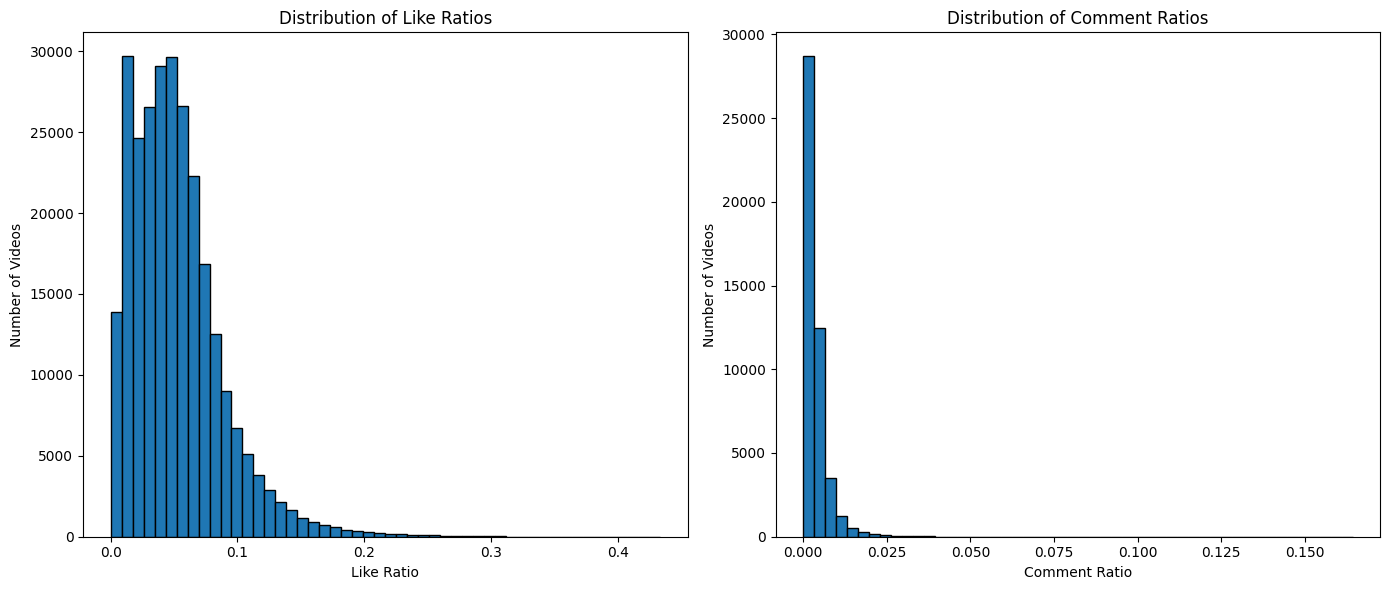

In [58]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(df_lc['like_ratio'], bins=50, edgecolor='black')
plt.title('Distribution of Like Ratios')
plt.xlabel('Like Ratio')
plt.ylabel('Number of Videos')

plt.subplot(1, 2, 2)
plt.hist(df_ulc['comment_ratio'], bins=50, edgecolor='black')
plt.title('Distribution of Comment Ratios')
plt.xlabel('Comment Ratio')
plt.ylabel('Number of Videos')

plt.tight_layout()
plt.show()

In [59]:
correlation_view = dfUnique[['like_ratio', 'comment_ratio', 'comment_count', 'likes', 'view_count']].corr(method='pearson')
correlation_spearman = dfUnique[['like_ratio', 'comment_ratio', 'comment_count', 'likes', 'view_count']].corr(method='spearman')

# Display the results
print("Pearson Correlation:\n", correlation_view)
print("\nSpearman Correlation:\n", correlation_spearman)


Pearson Correlation:
                like_ratio  comment_ratio  comment_count     likes  view_count
like_ratio       1.000000       0.397553       0.075805  0.210867   -0.021805
comment_ratio    0.397553       1.000000       0.238413  0.102149   -0.019629
comment_count    0.075805       0.238413       1.000000  0.685399    0.402247
likes            0.210867       0.102149       0.685399  1.000000    0.627792
view_count      -0.021805      -0.019629       0.402247  0.627792    1.000000

Spearman Correlation:
                like_ratio  comment_ratio  comment_count     likes  view_count
like_ratio       1.000000       0.475750       0.312076  0.557670   -0.020350
comment_ratio    0.475750       1.000000       0.519042  0.095660   -0.226291
comment_count    0.312076       0.519042       1.000000  0.727022    0.651364
likes            0.557670       0.095660       0.727022  1.000000    0.771007
view_count      -0.020350      -0.226291       0.651364  0.771007    1.000000


In [60]:
## this is weird.... seems like comments and likes ratios don't have a lot of effect, yet the comment_count and likes do..

In [61]:
category_mapping = {0: 'Film & Animation',
                   1: 'Autos & Vehicles',
                   2: 'Music',
                   3: 'Pets & Animals',
                   4: 'Sports',
                   5: 'Short Movies',
                   6: 'Travel & Events',
                   7: 'Gaming',
                   8: 'Videoblogging',
                   9: "People & Blogs",
                   10: 'Comedy',
                   11: 'Entertainment',
                   12: 'News & Politics',
                   13: 'Howto & Style',
                   14: 'Education',
                   15: 'Science & Technology',
                   16: 'Nonprofits & Activism',
                   17: 'Movies',
                   18: 'Anime/Animation',
                   19: 'Action/Adventure',
                   20: 'Classics',
                   21: 'Comedy',
                   22: 'Documentary',
                   23: 'Drama',
                   24: 'Family',
                   25: 'Foreign',
                   26: 'Horror',
                   27: 'Sci-Fi/Fantasy',
                   28: 'Thriller',
                   29: 'Shorts',
                   30: 'Shows',
                   31: 'Trailers'}
## pulled straight from the kaggle json file

In [62]:
df['category'] = df['categoryId'].map(category_mapping)
dfUnique['category'] = dfUnique['categoryId'].map(category_mapping)

In [63]:
df = pd.get_dummies(df, columns=['category'], prefix='cat', drop_first=True)
dfUnique = pd.get_dummies(dfUnique, columns=['category'], prefix='cat', drop_first=True)

In [64]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'comment_count', 'description', 'tag_count', 'tag_list', 'days_between',
       'like_ratio', 'comment_ratio', 'cat_Autos & Vehicles', 'cat_Classics',
       'cat_Comedy', 'cat_Documentary', 'cat_Drama', 'cat_Family',
       'cat_Foreign', 'cat_Horror', 'cat_Movies', 'cat_Music',
       'cat_Sci-Fi/Fantasy', 'cat_Science & Technology', 'cat_Shorts',
       'cat_Thriller'],
      dtype='object')

In [65]:
category_columns = [col for col in dfUnique.columns if col.startswith('cat_')]
category_view_counts = {}
for category in category_columns:
    category_view_counts[category] = (dfUnique[category] * dfUnique['view_count']).sum()
category_view_counts = dict(sorted(category_view_counts.items(), key=lambda item: item[1], reverse=True))

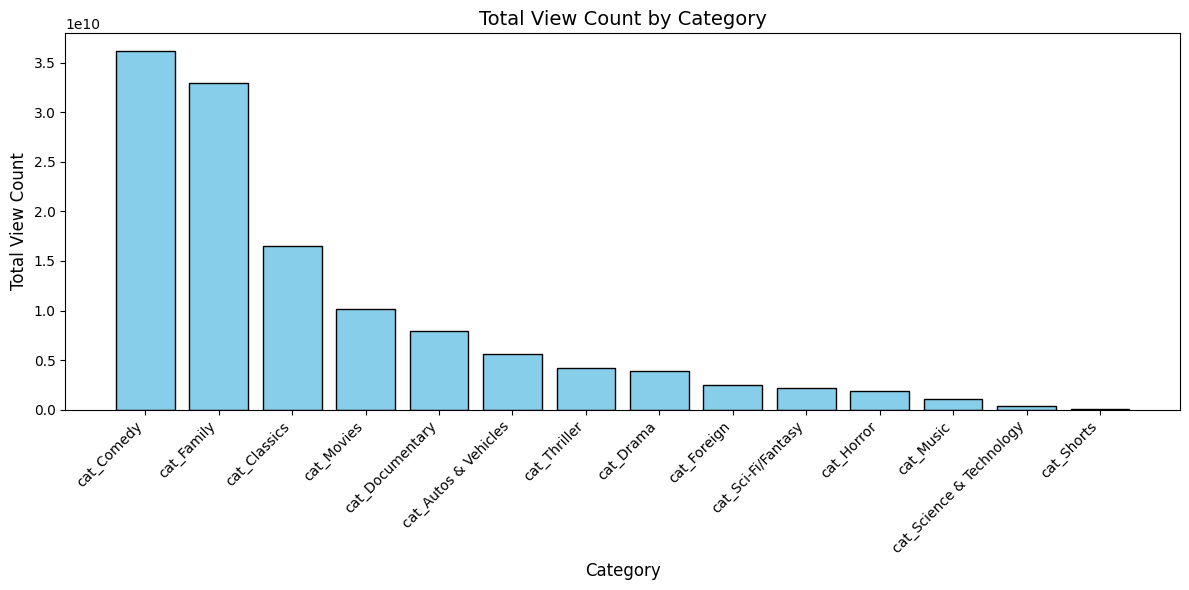

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(category_view_counts.keys(), category_view_counts.values(), color='skyblue', edgecolor='black')

plt.title('Total View Count by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total View Count', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [67]:
print((len(dfUnique['tag_count'] == 0)/ df.shape[0])) ## 17% of things don't have tags -- considerable amount

0.17538794658967882


In [68]:
min_date = dfUnique['publishedAt'].min()
max_date = dfUnique['publishedAt'].max()
print(min_date)
print(max_date)

2020-08-03 21:51:14
2024-04-14 10:00:53


In [70]:
## let's divide the data into relevant time columns
df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df['year_month'] = df['publishedAt'].dt.to_period('M')

dfUnique['year'] = dfUnique['publishedAt'].dt.year
dfUnique['month'] = dfUnique['publishedAt'].dt.month
dfUnique['year_month'] = dfUnique['publishedAt'].dt.to_period('M')

In [71]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [72]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [73]:
df['season'] = df['month'].apply(get_season)
dfUnique['season'] = dfUnique['month'].apply(get_season)

In [74]:
df['season']

0         Summer
1         Summer
2         Summer
3         Summer
4         Summer
           ...  
268782    Spring
268783    Spring
268784    Spring
268785    Spring
268786    Spring
Name: season, Length: 268787, dtype: object

In [75]:
df['title'][0:20]

0                    I ASKED HER TO BE MY GIRLFRIEND...
1     Apex Legends | Stories from the Outlands – “Th...
2     I left youtube for a month and THIS is what ha...
3     XXL 2020 Freshman Class Revealed - Official An...
4     Ultimate DIY Home Movie Theater for The LaBran...
5     I Haven't Been Honest About My Injury.. Here's...
6                              OUR FIRST FAMILY INTRO!!
7                                    CGP Grey was WRONG
8     SURPRISING MY DAD WITH HIS DREAM TRUCK!! | Lou...
9     Ovi x Natanael Cano x Aleman x Big Soto - Veng...
10                   i don't know what im doing anymore
11                       Try Not To Laugh Challenge #51
12    Rainbow Six Siege: Operation Shadow Legacy Rev...
13     Lil Yachty & Future - Pardon Me (Official Video)
14    When Our Generation Gets Old and Hears a Throw...
15                 Ten Minutes with Tyler Cameron | Q&A
16    Kylie Jenner Reacts To 'WAP' Music Video Backlash
17                              Our Farm Got Des

In [87]:
import spacy
import pytextrank
import en_core_web_sm
import nltk

In [102]:
spacy_nlp = spacy.load("en_core_web_sm")
spacy_nlp.add_pipe("textrank")

In [89]:
testing_text = "TextRank is a keyword extraction algorithm based on PageRank and has been widely used in natural language processing tasks."

In [90]:
doc = spacy_nlp(testing_text)
for phrase in doc._.phrases[:10]:
    print(phrase.text)

natural language processing tasks
PageRank
a keyword extraction algorithm
TextRank


In [91]:
doc = spacy_nlp("Kylie Jenner dissed over cameo in Cardi B and Megan The Stallion WAP music video and she reacts. Plus, Kendall Jenner is getting roasted on TikTok at the moment. #KendallJenner #WAP #KylieJennerKim Kardashian was spotted getting off a private jet when landing back in Los Angeles on July 28 after visiting her husband Kanye West and having a tearful conversation with him in a car.")
for phrase in doc._.phrases[:10]:
    print(phrase.text)

Kendall Jenner
Kylie Jenner
Cardi B
Kanye West
Los Angeles
KylieJennerKim Kardashian
WAP
The Stallion WAP music video
cameo
Cardi


In [151]:
## above funciton took way too long to run, trying to optimize by leveraging spacy's batch processing 
## to process multiple rows
# Disable unnecessary components for faster processing
#spacy_nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser', 'tagger'])

def get_keywords_batch(texts):
    docs = list(spacy_nlp.pipe(texts, batch_size=32))
    keywords_list = []
    for doc in docs:
        keywords = [phrase.text for phrase in doc._.phrases[:10]]
        keywords_list.append(keywords)
    return keywords_list

In [152]:
df['tag_list'] = dfUnique['tags'].apply(lambda x: x.split('|')[:-1])
df['tag_count'] = df['tag_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [193]:
dfUnique['tag_list'] = dfUnique['tags'].apply(lambda x: x.split('|')[:-1])
dfUnique['tag_count'] = df['tag_list'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [195]:
print((df['tag_count'] < 5).sum())
print((dfUnique['tag_count'] < 5).sum())

234424
12779


In [196]:
def update_tags_for_low_count_rows(df, min_tags=2):
    mask = df['tag_count'] < min_tags

    if mask.any():
        new_keywords = get_keywords_batch(df[mask]['title'].tolist())

        if df['tag_list'].dtype != 'object':
            df['tag_list'] = df['tag_list'].astype('object')
            
        df.loc[mask, 'tag_list'] = pd.Series(new_keywords, index=df[mask].index)
        df.loc[mask, 'tag_count'] = [len(tags) for tags in new_keywords]
    
    return df

In [197]:
df = update_tags_for_low_count_rows(df)
dfUnique = update_tags_for_low_count_rows(dfUnique)

In [198]:
print((df['tag_count'] < 5).sum())

172582


In [199]:
CACHE_FILE = "pytrends_cache.pkl"

In [279]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)


In [209]:
import pickle

In [281]:
pytrends = TrendReq(hl='en-US', tz=360)

# Cache location
CACHE_FILE = "pytrends_cache.pkl"

# Load or initialize cache
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, 'rb') as f:
        trends_cache = pickle.load(f)
else:
    trends_cache = {}

# Function to save cache
def save_cache():
    with open(CACHE_FILE, 'wb') as f:
        pickle.dump(trends_cache, f)

In [ ]:
def get_trend_score(keywords):
    """
    Fetch Pytrends interest scores for a list of keywords for the past week on YouTube. Cache results.
    :param keywords: List of strings (keywords/tags)
    :return: Dictionary of keyword scores
    """
    global trends_cache
    
    # Join keywords into a single query
    query = ','.join(keywords)
    
    # Check if cached
    if query in trends_cache:
        return trends_cache[query]
    
    # Fetch trends data
    try:
        pytrends.build_payload(keywords, timeframe='now 7-d', gprop='youtube')
        data = pytrends.interest_over_time()
        if not data.empty:
            weighted_score = (
                (data > 90).sum(axis=0).sum() * 3 +  # High weight for >90
                ((data > 50) & (data <= 90)).sum(axis=0).sum() * 2 +  # Moderate weight
                (data <= 50).sum(axis=0).sum() * 1  # Low weight
            )
            return weighted_score
        else:
            return 0
    except Exception as e:
        print(f"Error fetching trends data for {keywords}: {e}")
        return 0

    # Cache the result
    trends_cache[query] = score
    save_cache()
    
    return score


In [ ]:
def compute_pytrends_features(df):
    """
    Compute Pytrends scores for the tag_list of each row in a DataFrame.
    :param df: Pandas DataFrame with 'tag_list' column
    :return: Updated DataFrame with 'pytrends_score' column
    """
    df['pytrends_score'] = df['tag_list'].apply(lambda tags: get_trend_score(tags))
    return df



In [313]:
dfSubset = df.head(40).copy()

In [314]:
# Apply to DataFrame
dfSubset = compute_pytrends_features(dfSubset)

In [315]:
dfSubset['pytrends_score']

0     0.000000
1     0.000000
2     0.000000
3     1.076923
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    1.041420
15    0.000000
16    0.721893
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.591716
32    0.000000
33    0.591716
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
Name: pytrends_score, dtype: float64

In [ ]:
dfUnique  = compute_pytrends_features(dfUnique)

In [ ]:
dfUnique['pytrends_score']

In [327]:
df['max_view_count'] = df.groupby('video_id')['view_count'].transform('max')

In [365]:
df12 = df[df['days_between'].isin([1, 2])]

In [480]:
X = df12.pivot_table(index='video_id', columns='days_between', values='view_count', aggfunc='first')

In [481]:
X

days_between,1,2
video_id,,
--14w5SOEUs,3317372.0,4690242.0
--2O86Z0hsM,466980.0,NaN
--40TEbZ9Is,596317.0,638046.0
--47FjCWgrU,1758484.0,1829323.0
--DKkzWVh-E,402839.0,511186.0
...,...,...
zzd4ydafGR0,6133086.0,7424687.0
zziBybeSAtw,2598512.0,NaN
zzk09ESX7e0,3340184.0,5671761.0


In [482]:
non_nan_day_1_2 = X.dropna(subset=[1, 2])
rate_of_change = non_nan_day_1_2[2] / non_nan_day_1_2[1]
average_rate_of_change = rate_of_change.mean()
print(average_rate_of_change)

1.1912050236513607


In [483]:
X[2] = X.apply(lambda row: row[1] * average_rate_of_change if np.isnan(row[2]) else row[2], axis=1)

In [484]:
X

days_between,1,2
video_id,,
--14w5SOEUs,3317372.0,4.690242e+06
--2O86Z0hsM,466980.0,5.562689e+05
--40TEbZ9Is,596317.0,6.380460e+05
--47FjCWgrU,1758484.0,1.829323e+06
--DKkzWVh-E,402839.0,5.111860e+05
...,...,...
zzd4ydafGR0,6133086.0,7.424687e+06
zziBybeSAtw,2598512.0,3.095361e+06
zzk09ESX7e0,3340184.0,5.671761e+06


In [485]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'comment_count', 'description', 'tag_count', 'tag_list', 'days_between',
       'like_ratio', 'comment_ratio', 'cat_Autos & Vehicles', 'cat_Classics',
       'cat_Comedy', 'cat_Documentary', 'cat_Drama', 'cat_Family',
       'cat_Foreign', 'cat_Horror', 'cat_Movies', 'cat_Music',
       'cat_Sci-Fi/Fantasy', 'cat_Science & Technology', 'cat_Shorts',
       'cat_Thriller', 'year', 'month', 'year_month', 'season', 'keywords',
       'max_view_count'],
      dtype='object')

In [486]:
metadata = df.drop_duplicates(subset='video_id')[['video_id', 'channelTitle', 'view_count', 'likes',
       'comment_count', 'tag_count', 'tag_list', 'cat_Autos & Vehicles', 'cat_Classics',
       'cat_Comedy', 'cat_Documentary', 'cat_Drama', 'cat_Family',
       'cat_Foreign', 'cat_Horror', 'cat_Movies', 'cat_Music',
       'cat_Sci-Fi/Fantasy', 'cat_Science & Technology', 'cat_Shorts',
       'cat_Thriller', 'year', 'month', 'year_month', 'season',
       'max_view_count']]

In [487]:
X = pd.merge(X, metadata, on='video_id', how='left')

In [488]:
X.columns

Index([                'video_id',                          1,
                                2,             'channelTitle',
                     'view_count',                    'likes',
                  'comment_count',                'tag_count',
                       'tag_list',     'cat_Autos & Vehicles',
                   'cat_Classics',               'cat_Comedy',
                'cat_Documentary',                'cat_Drama',
                     'cat_Family',              'cat_Foreign',
                     'cat_Horror',               'cat_Movies',
                      'cat_Music',       'cat_Sci-Fi/Fantasy',
       'cat_Science & Technology',               'cat_Shorts',
                   'cat_Thriller',                     'year',
                          'month',               'year_month',
                         'season',           'max_view_count'],
      dtype='object')

In [489]:
y = X['max_view_count']

In [490]:
y

0         6823249
1          538485
2          682609
3         1940781
4          623949
           ...   
45786    13974461
45787     2598512
45788     9389223
45789     3079200
45790     2306803
Name: max_view_count, Length: 45791, dtype: int64

In [491]:
X.drop('max_view_count', axis=1, inplace=True)

In [492]:

X

,video_id,1,2,channelTitle,view_count,likes,comment_count,tag_count,tag_list,cat_Autos & Vehicles,...,cat_Movies,cat_Music,cat_Sci-Fi/Fantasy,cat_Science & Technology,cat_Shorts,cat_Thriller,year,month,year_month,season
0,--14w5SOEUs,3317372.0,4.690242e+06,4634,1076217,122830,9539,1,[Migos - Avalanche],0,...,0,0,0,0,0,0,2021,6,2021-06,Summer
1,--2O86Z0hsM,466980.0,5.562689e+05,8255,466980,16481,1278,2,"[ITSELF, MY TESLA]",0,...,0,0,0,0,0,0,2022,3,2022-03,Spring
2,--40TEbZ9Is,596317.0,6.380460e+05,6808,527742,6299,586,4,"[Supporting Actress, 73rd, Actress, a Comedy]",0,...,0,0,0,0,0,0,2021,9,2021-09,Fall
3,--47FjCWgrU,1758484.0,1.829323e+06,4906,1635672,20234,1834,5,"[Arizona Cardinals Game Highlights, San Franci...",0,...,1,0,0,0,0,0,2023,12,2023-12,Winter
4,--DKkzWVh-E,402839.0,5.111860e+05,5556,320130,18445,612,1,[Why Retaining Walls Collapse],0,...,0,0,1,0,0,0,2021,12,2021-12,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786,zzd4ydafGR0,6133086.0,7.424687e+06,4148,1466173,326042,34993,38,"[sleepy hallow, winners circle, drill music, d...",0,...,0,0,0,0,0,0,2021,2,2021-02,Winter
45787,zziBybeSAtw,2598512.0,3.095361e+06,4869,2284787,18919,2735,18,"[Neon, New Agent, VALORANT Episode 4, Episode ...",0,...,1,0,0,0,0,0,2021,1,2021-01,Winter
45788,zzk09ESX7e0,3340184.0,5.671761e+06,4317,1325906,313962,43991,4,"[MAMAMOO, [MV] 마마무, (MAMAMOO, We]",0,...,0,0,0,0,0,0,2021,6,2021-06,Summer
45789,zzsIqPVv2Q4,1908378.0,2.428879e+06,4546,1908378,52137,1705,4,"[HARDCORE Minecraft, 100 DAYS, a SLIME, I]",0,...,0,0,0,0,0,0,2022,4,2022-04,Spring


In [493]:
X.rename(columns={'1': 'day_1', '2': 'day_2'}, inplace=True)

In [494]:
X.columns

Index([                'video_id',                          1,
                                2,             'channelTitle',
                     'view_count',                    'likes',
                  'comment_count',                'tag_count',
                       'tag_list',     'cat_Autos & Vehicles',
                   'cat_Classics',               'cat_Comedy',
                'cat_Documentary',                'cat_Drama',
                     'cat_Family',              'cat_Foreign',
                     'cat_Horror',               'cat_Movies',
                      'cat_Music',       'cat_Sci-Fi/Fantasy',
       'cat_Science & Technology',               'cat_Shorts',
                   'cat_Thriller',                     'year',
                          'month',               'year_month',
                         'season'],
      dtype='object')

In [509]:
#X.drop('video_id', axis=1, inplace=True)
X.drop('tag_list', axis=1, inplace=True)

In [496]:
bool_cols = X.select_dtypes('bool').columns.tolist()
bool_cols
X[bool_cols] = X[bool_cols].astype(int)

In [318]:
### gradient boosting

In [497]:
X = pd.get_dummies(X, columns=['season'], drop_first=True)

In [498]:
X['season_Spring'] = X['season_Spring'].astype(int)
X['season_Summer'] = X['season_Summer'].astype(int)
X['season_Winter'] = X['season_Winter'].astype(int)

In [499]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['channelTitle'] = encoder.fit_transform(X['channelTitle'])
X['year_month'] = encoder.fit_transform(X['year_month'])

In [534]:
X['channelCount'] = dfUnique['channelTitle'].value_counts()

In [501]:
y

0         6823249
1          538485
2          682609
3         1940781
4          623949
           ...   
45786    13974461
45787     2598512
45788     9389223
45789     3079200
45790     2306803
Name: max_view_count, Length: 45791, dtype: int64

In [566]:
y2 = np.log(y + 1e-10)

In [567]:
y2

0        15.735846
1        13.196515
2        13.433678
3        14.478601
4        13.343824
           ...    
45786    16.452742
45787    14.770450
45788    16.055073
45789    14.940180
45790    14.651373
Name: max_view_count, Length: 45791, dtype: float64

In [320]:
import lightgbm as lgb
import xgboost as xgb

In [322]:
import timeit
import neptune

In [324]:
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import roc_auc_score

In [326]:
import warnings
import os
from dotenv import load_dotenv

In [583]:
from sklearn.preprocessing import StandardScaler

In [543]:
#X.drop('channelTitle', axis=1, inplace=True)
X.columns = X.columns.astype(str)

In [585]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=1234)

/Users/rishita/anaconda3/envs/google_env/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/rishita/anaconda3/envs/google_env/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/rishita/anaconda3/envs/google_env/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [586]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)


In [587]:
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [578]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

In [588]:
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xgb.train(params = param, dtrain = dtrain_reg, num_boost_round = 10) 
pred = xgb_r.predict(dtest_reg) 

/Users/rishita/anaconda3/envs/google_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [18:32:20] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [577]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [589]:
r2 = r2_score(y_test, pred)
print(r2)

0.8178551197052002


In [576]:
rmse = root_mean_squared_error(y_test, pred)
print("RMSE : % f" %(rmse)) 

RMSE :  1.121741
